<a href="https://colab.research.google.com/github/samarthya04/IIIT-A-internship/blob/main/Caravan%20insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/IIIT-A Internship/caravan-insurance-challenge.csv'
data = pd.read_csv(path)

In [25]:
data

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,test,33,1,2,4,8,0,7,2,0,...,0,0,0,1,0,0,0,0,0,0
9818,test,24,1,2,3,5,1,5,1,3,...,0,0,0,1,0,0,0,0,0,1
9819,test,36,1,2,3,8,1,5,1,3,...,0,0,0,1,0,0,0,1,0,0
9820,test,33,1,3,3,8,1,4,2,3,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORIGIN    9822 non-null   object
 1   MOSTYPE   9822 non-null   int64 
 2   MAANTHUI  9822 non-null   int64 
 3   MGEMOMV   9822 non-null   int64 
 4   MGEMLEEF  9822 non-null   int64 
 5   MOSHOOFD  9822 non-null   int64 
 6   MGODRK    9822 non-null   int64 
 7   MGODPR    9822 non-null   int64 
 8   MGODOV    9822 non-null   int64 
 9   MGODGE    9822 non-null   int64 
 10  MRELGE    9822 non-null   int64 
 11  MRELSA    9822 non-null   int64 
 12  MRELOV    9822 non-null   int64 
 13  MFALLEEN  9822 non-null   int64 
 14  MFGEKIND  9822 non-null   int64 
 15  MFWEKIND  9822 non-null   int64 
 16  MOPLHOOG  9822 non-null   int64 
 17  MOPLMIDD  9822 non-null   int64 
 18  MOPLLAAG  9822 non-null   int64 
 19  MBERHOOG  9822 non-null   int64 
 20  MBERZELF  9822 non-null   int64 
 21  MBERBOER  9822

In [5]:
train_data = data[data.iloc[:, 0] == 'train']
test_data = data[data.iloc[:, 0] == 'test']

X_train = train_data.iloc[:, 1:-1]
y_train = train_data.iloc[:, -1]

X_test = test_data.iloc[:, 1:-1]
y_test = test_data.iloc[:, -1]

In [6]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_1 = rf.predict(X_test)

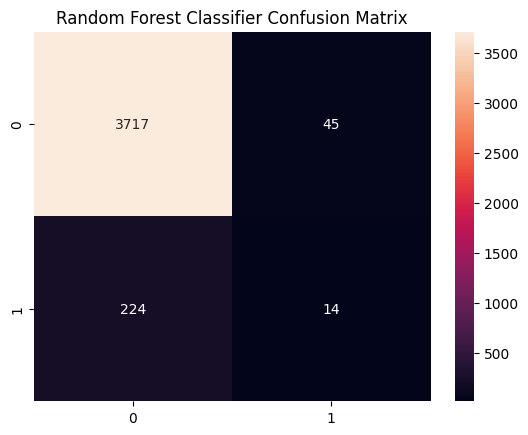

In [8]:
from sklearn.metrics import *
plt.title('Random Forest Classifier Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_1), annot=True, fmt='g')
plt.show()

In [9]:
accuracy_1 = accuracy_score(y_test, y_pred_1)*100
print("Accuracy is: ", accuracy_1)

Accuracy is:  93.27499999999999


# Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

df = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=5)
df.fit(X_train, y_train)
y_pred_2 = df.predict(X_test)

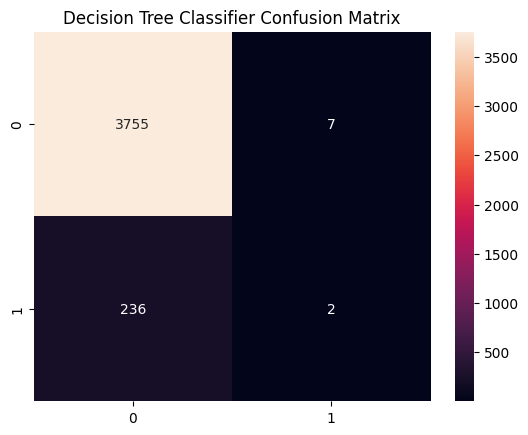

In [11]:
plt.title('Decision Tree Classifier Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_2), annot=True, fmt='g')
plt.show()

In [12]:
accuracy_2 = accuracy_score(y_test, y_pred_2)*100
print("Accuracy is: ", accuracy_2)

Accuracy is:  93.925


# KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_3 = knn.predict(X_test)

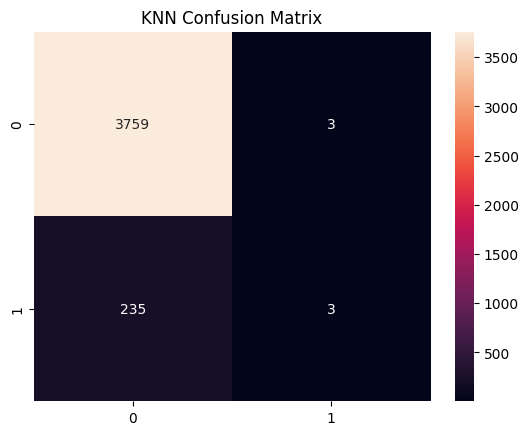

In [14]:
plt.title("KNN Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_3), annot=True, fmt='g')
plt.show()

In [15]:
accuracy_3 = accuracy_score(y_test, y_pred_3)*100
print("Accuracy is: ", accuracy_3)

Accuracy is:  94.05


# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=10000)
logr.fit(X_train, y_train)
y_pred_4 = logr.predict(X_test)

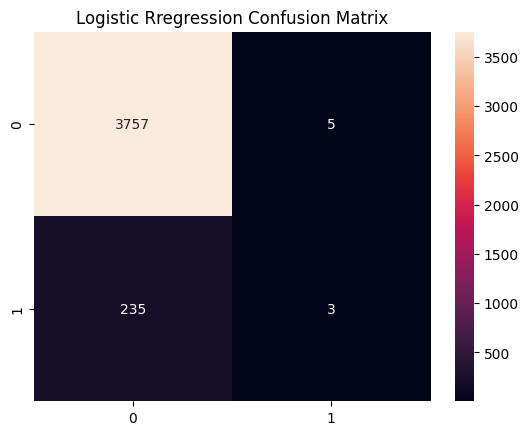

In [17]:
plt.title('Logistic Rregression Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_4), annot=True, fmt='g')
plt.show()

In [18]:
accuracy_4 = accuracy_score(y_test, y_pred_4)*100
print("Accuracy is: ", accuracy_4)

Accuracy is:  94.0


# Naive Bayes


In [19]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_5 = gnb.predict(X_test)
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.99      0.07      0.14      3762
           1       0.06      0.98      0.12       238

    accuracy                           0.13      4000
   macro avg       0.52      0.53      0.13      4000
weighted avg       0.93      0.13      0.14      4000



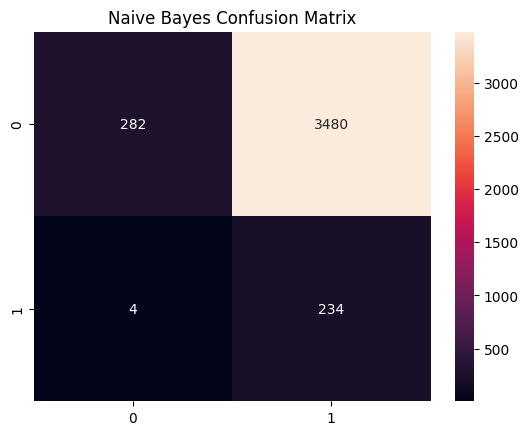

In [20]:
plt.title('Naive Bayes Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_5), annot=True, fmt='g')
plt.show()

In [21]:
accuracy_5 = accuracy_score(y_test, y_pred_5)*100
print("Accuracy is: ", accuracy_5)

Accuracy is:  12.9


# SVM


In [22]:
from sklearn import svm

sv = svm.SVC(kernel='linear', C=1)
sv.fit(X_train, y_train)
y_pred_6 = sv.predict(X_test)

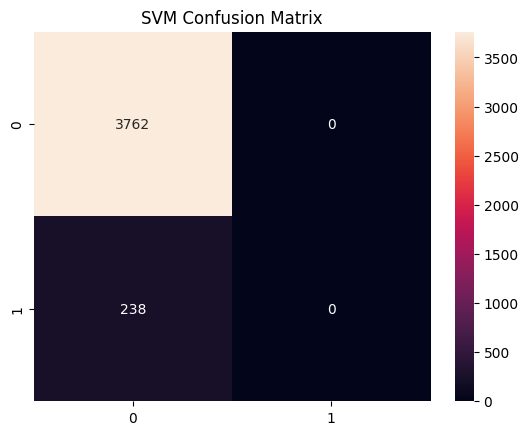

In [23]:
plt.title('SVM Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_6), annot=True, fmt='g')
plt.show()

In [24]:
accuracy_6 = accuracy_score(y_test, y_pred_6)*100
print("Accuracy is: ", accuracy_6)

Accuracy is:  94.05
